# Analisis EDA de las Encuestas Multiproposito (años 2014, 2017 y 2021) y cálculo del IPM

A continuación se realizará un análisis general de las Encuestas Multiproposito de los años 2014, 2017 y 2021, evaluando los valores faltantes, distribuciones, entre otros de cada una de ellas. Luego, con base en las preguntas seleccionadas, se realizará el cálculo manual del IPM (Índice de pobreza multidimensional), para determinar el porcentaje de personas pobres por localidad y finalmente compararlo con los valores reales calculados por el DANE.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerias

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Información axuliar

### Edad esperada para cada grado de estudio
| años | grado      |
| ---- | ---------- |
| 5    | transicion |
| 6    | primero    |
| 7    | segundo    |
| 8    | tercero    |
| 9    | cuarto     |
| 10   | quinto     |
| 11   | sexto      |
| 12   | septimo    |
| 13   | octavo     |
| 14   | noveno     |
| 15   | decimo     |
| 16   | onceavo    |

## Componentes para calculo del IPM

| Componentes                                                           | Llave IPM |
| --------------------------------------------------------------------- | --------- |
| Bajo logro educativo                                                  | A         |
| Analfabetismo                                                         | B         |
| Inasistencia escolar                                                  | C         |
| Rezago escolar                                                        | D         |
| Barreras de acceso a servicios para el cuidado de la primera infancia | E         |
| Trabajo infantil                                                      | F         |
| Tasa de dependencia economica                                         | G         |
| Empleo informal                                                       | H         |
| Sin aseguramiento de salud                                            | I         |
| Barreras de acceso a servicios de salud                               | J         |
| Sin acceso a fuente de agua mejorada                                  | K         |
| Inadecuada eliminacion de excretas                                    | L         |
| Pisos inadecuados                                                     | M         |
| Paredes exteriores inadecuadas                                        | N         |
| Hacinamiento critico                                                  | O         |

## Preguntas

| Preguntas | Descripción                                                                                                                                                         |
| --------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| COD_UPZ         | Código de la UPZ                                                                                                                                                       |
| DIRECTORIO_HOG  | Llave. Numero unico identificador de Persona dentro del Hogar.                                                                               |
| DIRECTORIO_PER  | Llave. Número único identificador del Hogar dentro de la vivienda.                                                                               |
| DPTOMPIO        | Divipola departamento-municipio                                                                                                                                   |
| FEX_C           | Factor de expansión calibrado                                                                                                                                     |
| NHCCP20         |¿En cuántos de esos cuartos duermen las personas del hogar?                                                                                                  |
| NHCCPCTRL2      |¿Cuántas personas componen este hogar?                                                                                                                       |
| NPCEP4          |¿Cuántos años cumplidos tiene ... ?                                                                                                                           |
| NPCFP1          |¿ ... está afiliado(a) ( cotizante o beneficiario(a)) a alguna entidad de seguridad social en salud?<br>                                                      |
| NPCFP16         |En los ÚLTIMOS 30 DÍAS, ¿ ... tuvo alguna enfermedad, accidente, problema odontológico o algún otro problema de salud que NO haya implicado hospitalización? |
| NPCFP19         |¿Qué hizo principalmente ... para tratar ese problema de salud?                                                                                              |
| NPCGP1          |¿Dónde o con quién permanece ... durante la mayor parte del tiempo entre semana?                                                                                |
| NPCHP1          |¿ ... sabe leer y escribir?                                                                                                                                   |
| NPCHP2          |¿ ... actualmente estudia (asiste al preescolar, escuela, colegio, o universidad)?                                                                            |
| NPCHP4         |¿Cuál es el nivel educativo más alto alcanzado por … y el último año o grado aprobado en este nivel?                                                                                                                                     |
| NPCKP1          |¿En qué actividad ocupó ... la mayor parte del tiempo la SEMANA PASADA?                                                                                       |
| NPCKP2          |Además de lo anterior, ¿ ... realizó la SEMANA PASADA alguna actividad paga por una hora o más?                                                               |
| NPCKP3          |Aunque ... no trabajó la SEMANA PASADA por una hora o más en forma remunerada, ¿tenía durante esa SEMANA algún trabajo o negocio por el que recibe ingresos?  |
| NPCKP4          |¿ ... trabajó la SEMANA PASADA en un negocio por una hora o más, sin que le pagaran?                                                                          |
| NPCKP50         |¿Está ... cotizando actualmente a un fondo de pensiones?                                                                                                     |
| NVCBP11B        |¿Con cuáles de los siguientes servicios públicos, privados o comunales cuenta la vivienda?<br>2\. Acueducto                                                  |
| NVCBP11C        |¿Con cuáles de los siguientes servicios públicos, privados o comunales cuenta la vivienda?<br>3\. Alcantarillado                                             |
| NVCBP12         |¿Cuál es el material predominante de las paredes exteriores?                                                                                                 |
| NVCBP13         |¿Cuál es el material predominante de los pisos?                                                                                                              |
| NPCGP13         |ENTRE SEMANA, ¿en dónde y cuántas horas al día permanece ... la mayor parte del tiempo de las 6 a.m. a las 6 p.m.?                                                                                                 |
| NVCBP18         |¿Quién se encarga principalmente del cuidado de ... en el sitio donde está la mayor parte del tiempo entre semana o después de estar en el jardín o centro de desarrollo infantil?                                                                                                              |

## Equivalencia entre preguntas y el componente del IPM con el que se relacionan

| Variables      | Nuevo nombre       | Respuestas                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               | IPM                       |
| -------------- | ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------------- |
| DIRECTORIO_HOG | directorio_hog     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | A, B, C, D, F, G, H, I, J |
| DIRECTORIO_PER | directorio_per     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | A, B, C, D, F, G, H, I, J |
| NPCEP4         | edad               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | A, B, C, D, F, I          |
| NPCHP4        | ultm_grado         |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | A, D                      |
| NPCHP1         | read_and_write     | 1 » Si<br>2 » No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | B                         |
| NPCHP2         | estudia            | 1 » Si<br>2 » No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| NPCGP1         | cuidado_menor      | 1 » Asiste a un hogar comunitario, jardín, centro de desarrollo infantil o colegio<br>2 » Con su padre o madre en la casa<br>3 » Con su padre o madre en el trabajo<br>4 » Con empleado(a) o niñero(a) en la casa<br>5 » Al cuidado de un(a) pariente de 18 años o más<br>6 » Al cuidado de un(a) pariente menor de 18 años<br>7 » En casa solo<br>8 » Otro                                                                                                                                                                                                                                                                                                                                                                                                              | E                         |
| NPCGP13        | lugar_cuidado_menor  | 1 » En su casa<br>2 » En otra casa<br>3 » En un lugar de trabajo<br>4 » En el hogar comunitario o jardín                                                                                                                                                                                                                                                                                                                                                                                                            | E                         |
| NPCGP18         | persona_cuidado_menor      | 1 » Una persona de este hogar<br>2 » Un hombre de otro hogar<br>3 » Una mujer de otro hogar<br>4 » Nadie le cuida                                                                                                                                                                                                                                                                                                                                                                                                              | E                         |
| NPCKP1         | ocupacion_ultm_sem | 1 » Trabajando<br>2 » Buscando trabajo<br>3 » Estudiando<br>4 » Oficios del hogar<br>5 » Incapacitado(a) permanente para trabajar<br>6 » Otra actividad                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | G, H, F                   |
| NPCKP2         | act_pag_ultm_sem   | 1 » Si<br>2 » No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | G, H, F                   |
| NPCKP3         | trab_ultm_sem      | 1 » Si<br>2 » No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | G, H, F                   |
| NPCKP4         | trb_nopag_ultm_sem | 1 » Si<br>2 » No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | G, H, F                   |
| NPCKP50        | pension            | 1 » Si<br>2 » No<br>3 » Ya es pensionado                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | H                         |
| NPCFP1         | sssi               | 1 » Si<br>2 » No<br>9 » No sabe, no informa                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | I                         |
| NPCFP16        | enfermo_ultm_mes   | 1 » Si<br>2 » No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | J                         |
| NPCFP19        | tratam_enf         | 1 » Utilizó los servicios (medicina general, especializada, odontología, terapéutica, enfermería) a los  (...)<br>2 » Utilizó los servicios a los cuales tiene derecho por su afiliación  a medicina prepagada o plan comp (...)<br>3 » Utilizó servicios médicos particulares (medicina general,  especializada, odontología, terapéutica,  (...)<br>4 » Acudió a una ESE (Empresa Social del Estado), hospital o centro  de salud (sin utilizar los servicio (...)<br>5 » Acudió a una farmacia, botica o droguería<br>6 » Consultó a un tegua, comadrona, curandero(a), yerbatero(a)<br>7 » Asistió a terapias alternativas practicadas por personal no profesional (acupuntura, musicoterapia,  (...)<br>8 » Usó remedios caseros<br>9 » Se autorrecetó<br>10 » Nada | J                         |
| NVCBP11B       | acueducto          | 1 » Si<br>2 » No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | K                         |
| NVCBP11C       | alcantarillado     | 1 » Si<br>2 » No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | L                         |
| NVCBP13        | material_pisos     | 1 » Alfombra o tapete de pared a pared<br>2 » Madera pulida y lacada, parqué<br>3 » Mármol<br>4 » Baldosa, vinilo, tableta, ladrillo, laminado o flotante<br>5 » Madera burda, tabla o tablón, otro vegetal<br>6 » Cemento, gravilla<br>7 » Tierra, arena                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | M                         |
| NVCBP12        | material_paredes   | 1 » Bloque, ladrillo, piedra, madera pulida<br>2 » Tapia pisada, adobe<br>3 » Bahareque revocado<br>4 » Bahareque sin revocar<br>5 » Madera burda, tabla, tablón<br>6 » Material prefabricado<br>7 » Guadua, caña, esterilla, otro vegetal<br>8 » Zinc, tela, lona, cartón, latas, desechos, plástico<br>9 » Sin paredes                                                                                                                                                                                                                                                                                                                                                                                                                                                 | N                         |
| NHCCP20        | qt_cuartos_dormir  |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | O                         |
| NHCCPCTRL2     | qt_pers_hogar      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | O                         |
| COD_UPZ        | COD_UPZ            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   | Otros                     |
| DPTOMPIO       | divipola_cod       |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | Otros                     |
| FEX_C          | fex_c              |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | Otros                     |

# Resumen de la informacion

In [ ]:
df_2017 = pd.read_csv('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/em2017_cleaned.csv')
df_2017 = df_2017.rename(columns={'dptompio': 'divipola_cod',
                        'nvcbp11b': 'acueducto',
                        'nvcbp11c':'alcantarillado',
                        'nvcbp12':'material_paredes',
                        'nvcbp13': 'material_pisos',
                        'nhccpctrl2': 'qt_pers_hogar',
                        'nhccp20': 'qt_cuartos_dormir',
                        'npcfp1': 'sssi',
                        'npcfp16': 'enfermo_ultm_mes',
                        'npcfp19': 'tratam_enf',
                        'npcgp1': 'cuidado_menor',
                        'npchp1': 'read_and_write',
                        'npchp4': 'ultm_grado',
                        'npckp50': 'pension',
                        'npcep4': 'edad',
                        'npchp2': 'estudia',
                        'npckp1': 'ocupacion_ultm_sem',
                        'npckp2': 'activ_pag_ultm_sem',
                        'npckp3': 'trabajo_ultm_sem',
                        'npckp4': 'trabajo_nopag_ultm_sem'})
df_2017['año_em'] = 2017

df_2021 = pd.read_csv('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/em2021_cleaned.csv')
df_2021 = df_2021.rename(columns={'mpio': 'divipola_cod',
                        'nvcbp11b': 'acueducto',
                        'nvcbp11c':'alcantarillado',
                        'nvcbp12':'material_paredes',
                        'nvcbp13': 'material_pisos',
                        'nhccpctrl2': 'qt_pers_hogar',
                        'nhccp20': 'qt_cuartos_dormir',
                        'npcfp1': 'sssi',
                        'npcfp16': 'enfermo_ultm_mes',
                        'npcfp19': 'tratam_enf',
                        'npcgp1': 'cuidado_menor',
                        'npchp1': 'read_and_write',
                        'npchp4': 'ultm_grado',
                        'npckp50': 'pension',
                        'npcep4': 'edad',
                        'npchp2': 'estudia',
                        'npckp1': 'ocupacion_ultm_sem',
                        'npckp2': 'activ_pag_ultm_sem',
                        'npckp3': 'trabajo_ultm_sem',
                        'npckp4': 'trabajo_nopag_ultm_sem',
                        'cod_upz_grupo': 'cod_upz'})
df_2021['año_em'] = 2021

In [ ]:
print(len(df_2017.columns))

25


In [ ]:
conteo_2017 = df_2017.groupby('cod_upz').size()
conteo_2021 = df_2021.groupby('cod_upz').size()

conteo_total = pd.Index(list(conteo_2017.index) + list(conteo_2021.index)).unique()

conteo_2017_alineado = conteo_2017.reindex(conteo_total, fill_value=0)
conteo_2021_alineado = conteo_2021.reindex(conteo_total, fill_value=0)

diferencia_conteo = conteo_2017_alineado - conteo_2021_alineado

print(f"Total de individuos para año 2017: {len(df_2017)}")
print(f"Total de individuos para año 2021: {len(df_2021)}")
print(f"Mediana de diferencia de individuos entre los 2 años por region: {diferencia_conteo.min()}")

Total de individuos para año 2017: 319952
Total de individuos para año 2021: 292281
Mediana de diferencia de individuos entre los 2 años por region: -2513


In [ ]:
print("UPZ que existen en 2021 y no en 2017")
print(df_2021['cod_upz'][~df_2021['cod_upz'].isin(df_2017['cod_upz'])].unique())
print("UPZ que existen en 2017 y no en 2021")
print(df_2017['cod_upz'][~df_2017['cod_upz'].isin(df_2021['cod_upz'])].unique())
# print(df_2017[df_2017['cod_upz'] == 36])
# print(df_2021[df_2021['cod_upz'] == 801])

UPZ que existen en 2021 y no en 2017
[ 36.  25.  53. 116.  14.   9.  20.]
UPZ que existen en 2017 y no en 2021
[805. 801.]


Se transforman los cod_upz del 2021 para que se adapten a las agrupaciones de upz del 2017. Luego, se construye el df uniendo las encuestas de ambos años y finalmente nos aseguramos de seleccionar solo las encuestas de Bogota

In [ ]:
df_2021['cod_upz'] = df_2021['cod_upz'].replace({36: 801, 53: 801,
                                                 25: 805, 20: 805,
                                                 31: 810, 116: 810, 105: 810,
                                                 14: 803, 15: 803, 16: 803,
                                                 1: 804, 9: 804, 10: 804})
df = pd.concat([df_2017, df_2021], ignore_index=True)

df_bogota = df[df['divipola_cod'] == 11001].copy()

# print(df.describe())
print("Muestra de los primeros 5 valores de cada columna")
print(df_bogota.head())
print("\nDistribucion de las columnas junto a sus tipos")
print(df_bogota.info())

Muestra de los primeros 5 valores de cada columna
   directorio_hog  directorio_per  edad  ultm_grado  read_and_write  estudia  \
0         1010001        10100011    56         9.0             1.0      2.0   
1         1010001        10100012    48        11.0             1.0      2.0   
2         1010001        10100013    22         8.0             1.0      2.0   
3         1010011        10100111    42         NaN             1.0      1.0   
4         1010011        10100112    43         7.0             1.0      2.0   

   cuidado_menor  ocupacion_ultm_sem  activ_pag_ultm_sem  trabajo_ultm_sem  \
0            NaN                 1.0                 NaN               NaN   
1            NaN                 1.0                 NaN               NaN   
2            NaN                 1.0                 NaN               NaN   
3            NaN                 1.0                 NaN               NaN   
4            NaN                 4.0                 2.0               2.0   



Se verifican que no hayan encuestas de personas duplicadas

In [ ]:
# print(df_bogota['divipola_cod'].head(20))
print(df_bogota['directorio_per'].duplicated().any())

True


#Estadisticas descriptivas

In [ ]:
print(df_bogota.shape)
print(df_bogota.describe())
# print(df_bogota[df_bogota['edad'] == 2])

(456912, 25)
       directorio_hog  directorio_per           edad     ultm_grado  \
count    4.569120e+05    4.569120e+05  456912.000000  325944.000000   
mean     6.738358e+06    6.764818e+07      36.693481       6.078127   
std      6.581814e+06    6.760015e+07      21.299267       2.724515   
min      1.010001e+06    1.010001e+07       0.000000       1.000000   
25%      1.850956e+06    1.851479e+07      20.000000       4.000000   
50%      3.289561e+06    3.290481e+07      35.000000       5.000000   
75%      1.054854e+07    1.054975e+08      53.000000       9.000000   
max      3.006812e+07    2.193150e+09     108.000000      15.000000   

       read_and_write        estudia  cuidado_menor  ocupacion_ultm_sem  \
count   434120.000000  434120.000000   22792.000000       407058.000000   
mean         1.021879       1.750815       2.198929            2.368618   
std          0.146288       0.432541       1.410269            1.522611   
min          1.000000       1.000000       1.00

# Valores faltantes

In [ ]:
faltantes = df_bogota.isnull().sum().to_frame(name='faltantes')
faltantes['%'] = (faltantes['faltantes'] / len(df_bogota)) * 100
faltantes = faltantes.sort_values(by='faltantes', ascending=False)

faltantes
# print(df_bogota['read_and_write'].unique())
# print(df_bogota['lugar_menor'].isnull().sum())

,faltantes,%
tratam_enf,442481,96.841624
cuidado_menor,434120,95.011731
trabajo_nopag_ultm_sem,273619,59.884398
trabajo_ultm_sem,270938,59.297633
activ_pag_ultm_sem,262119,57.367502
ultm_grado,130968,28.663725
pension,78881,17.263937
ocupacion_ultm_sem,49854,10.911073
read_and_write,22792,4.988269
estudia,22792,4.988269


Luego de evaluar los formularios usados para realizar las encuestas, se definen una serie de reglas para asignar etiquetas de "No Aplica" o "No responde", con el objetivo de eliminar los valores faltantes y poder calcular los IPM sin problema. Y finalmente se vuelvan a calcular el porcentaje de valores faltantes.

In [ ]:
#Nuevas categorias
## 99 - No aplica
## 98 - No responde

df_bogota_cleaned = df_bogota[df_bogota['cod_upz'].notna()].copy()

df_bogota_cleaned.loc[df_bogota_cleaned['cuidado_menor'].isna() & (df_bogota_cleaned['edad'] >= 5), 'cuidado_menor'] = 99 #No aplica para personas de 5 años o mas

df_bogota_cleaned.loc[df_bogota_cleaned['tratam_enf'].isna() & (df_bogota_cleaned['enfermo_ultm_mes'] == 2), 'tratam_enf'] = 99 #No aplica si la persona no reporta haber estado enfermo en el ultimo mes

df_bogota_cleaned.loc[df_bogota_cleaned['ocupacion_ultm_sem'].isna() & (df_bogota_cleaned['edad'] < 10), 'ocupacion_ultm_sem'] = 99 #La pregunta solo se hace a personas mayores de 10 años

df_bogota_cleaned.loc[df_bogota_cleaned['trabajo_nopag_ultm_sem'].isna() & ((df_bogota_cleaned['edad'] < 10) |
                      (df_bogota_cleaned['ocupacion_ultm_sem'].isin([1,5]))), 'trabajo_nopag_ultm_sem'] = 99 #No aplica si es de 10 años o menor, o si reporto como actividad principal estar trabajando o si reporta estar incapacitado permanentemente
df_bogota_cleaned['trabajo_nopag_ultm_sem'] = df_bogota_cleaned['trabajo_nopag_ultm_sem'].fillna(98)

df_bogota_cleaned.loc[df_bogota_cleaned['trabajo_ultm_sem'].isna() & ((df_bogota_cleaned['edad'] < 10) |
                      (df_bogota_cleaned['ocupacion_ultm_sem'].isin([1,5]))), 'trabajo_ultm_sem'] = 99 #No aplica si es de 10 años o menor, o si reporto como actividad principal estar trabajando o si reporta estar incapacitado permanentemente
df_bogota_cleaned['trabajo_ultm_sem'] = df_bogota_cleaned['trabajo_ultm_sem'].fillna(98)

df_bogota_cleaned.loc[df_bogota_cleaned['activ_pag_ultm_sem'].isna() & ((df_bogota_cleaned['edad'] < 10) |
                      (df_bogota_cleaned['ocupacion_ultm_sem'].isin([1,5]))), 'activ_pag_ultm_sem'] = 99 #No aplica si es de 10 años o menor, o si reporto como actividad principal estar trabajando o si reporta estar incapacitado permanentemente

df_bogota_cleaned.loc[df_bogota_cleaned['pension'].isna() & (df_bogota_cleaned['edad'] < 15), 'pension'] = 99 #No aplica si es menor de 15 años

df_bogota_cleaned.loc[df_bogota_cleaned['read_and_write'].isna() & (df_bogota_cleaned['edad'] < 5), 'read_and_write'] = 99 #No aplica para personas de 5 años o menos

df_bogota_cleaned.loc[df_bogota_cleaned['estudia'].isna() & (df_bogota_cleaned['edad'] < 5), 'estudia'] = 99 #No aplica para personas de 5 años o menos

df_bogota_cleaned.loc[df_bogota_cleaned['ultm_grado'].isna() &
                      ((df_bogota_cleaned['edad'] < 5) |
                      (df_bogota_cleaned['estudia'] == 1)), 'ultm_grado'] = 0 #No aplica para personas de 5 años o menos, o si reporta que se encuentra estudiando

df_bogota_cleaned['ocupado'] = ((df_bogota_cleaned['ocupacion_ultm_sem'] == 1) |
                                (df_bogota_cleaned['trabajo_nopag_ultm_sem'] == 1) |
                                (df_bogota_cleaned['trabajo_ultm_sem'] == 1) |
                                (df_bogota_cleaned['activ_pag_ultm_sem'] == 1)) #Una persona ocupada es aquella que haya trabajado, en algo pago o no pago, la ultima semana

df_bogota_cleaned['per_por_cuarto'] = df_bogota_cleaned['qt_pers_hogar'] / df_bogota_cleaned['qt_cuartos_dormir'] #Se calcula la cantidad de personas que duermen por cuarto

post_faltantes = df_bogota_cleaned.isnull().sum().to_frame(name='faltantes')
post_faltantes['%'] = (post_faltantes['faltantes'] / len(df_bogota_cleaned)) * 100
post_faltantes = post_faltantes.sort_values(by='faltantes', ascending=False)

print(post_faltantes)
print("Codigos upz faltantes")
print(df_bogota_cleaned[df_bogota_cleaned['directorio_hog'] == 1115891]['cod_upz'])

                        faltantes    %
directorio_hog                  0  0.0
directorio_per                  0  0.0
edad                            0  0.0
ultm_grado                      0  0.0
read_and_write                  0  0.0
estudia                         0  0.0
cuidado_menor                   0  0.0
ocupacion_ultm_sem              0  0.0
activ_pag_ultm_sem              0  0.0
trabajo_ultm_sem                0  0.0
trabajo_nopag_ultm_sem          0  0.0
pension                         0  0.0
sssi                            0  0.0
enfermo_ultm_mes                0  0.0
tratam_enf                      0  0.0
acueducto                       0  0.0
alcantarillado                  0  0.0
material_pisos                  0  0.0
material_paredes                0  0.0
qt_cuartos_dormir               0  0.0
qt_pers_hogar                   0  0.0
cod_upz                         0  0.0
divipola_cod                    0  0.0
fex_c                           0  0.0
año_em                   

In [ ]:
df_bogota_cleaned[['directorio_hog', 'cod_upz', 'año_em', 'fex_c']].to_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/hogares por año 2017-2021.xlsx', index=False)

# Boxplot

Se crean gráficas para evaluar las distribuciones de la cantidad de personas por hogar, cuartos dispuestos para dormir y personas por cuartos para dormir. Intentando determinar si hay valores atípicos muy alejados del resto

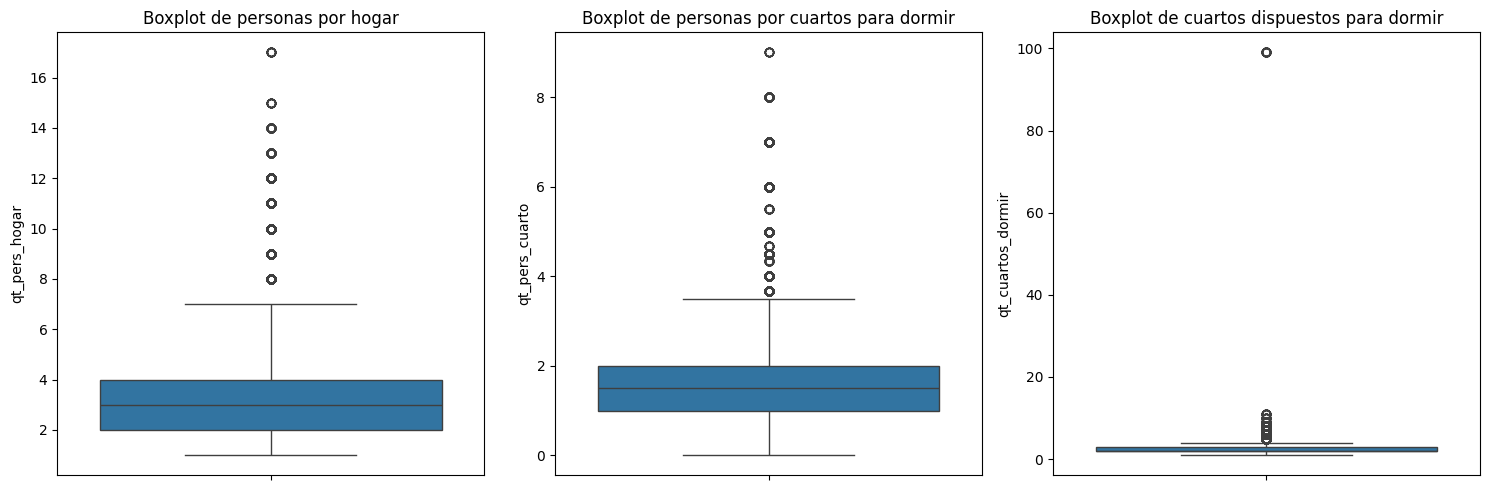

In [ ]:
df_bogota_cleaned['qt_pers_cuarto'] = df_bogota_cleaned['qt_pers_hogar'].astype(int) / df_bogota_cleaned['qt_cuartos_dormir'].astype(int)

# Crear subplots para mostrar los boxplots uno al lado del otro
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot para 'qt_pers_hogar'
sns.boxplot(ax=axes[0], y=df_bogota_cleaned['qt_pers_hogar'])
axes[0].set_title('Boxplot de personas por hogar')

# Boxplot para 'qt_pers_cuartos'
sns.boxplot(ax=axes[2], y=df_bogota_cleaned['qt_cuartos_dormir'])
axes[2].set_title('Boxplot de cuartos dispuestos para dormir')

# Boxplot para 'qt_cuartos_hogar'
sns.boxplot(ax=axes[1], y=df_bogota_cleaned['qt_pers_cuarto'])
axes[1].set_title('Boxplot de personas por cuartos para dormir')

plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()


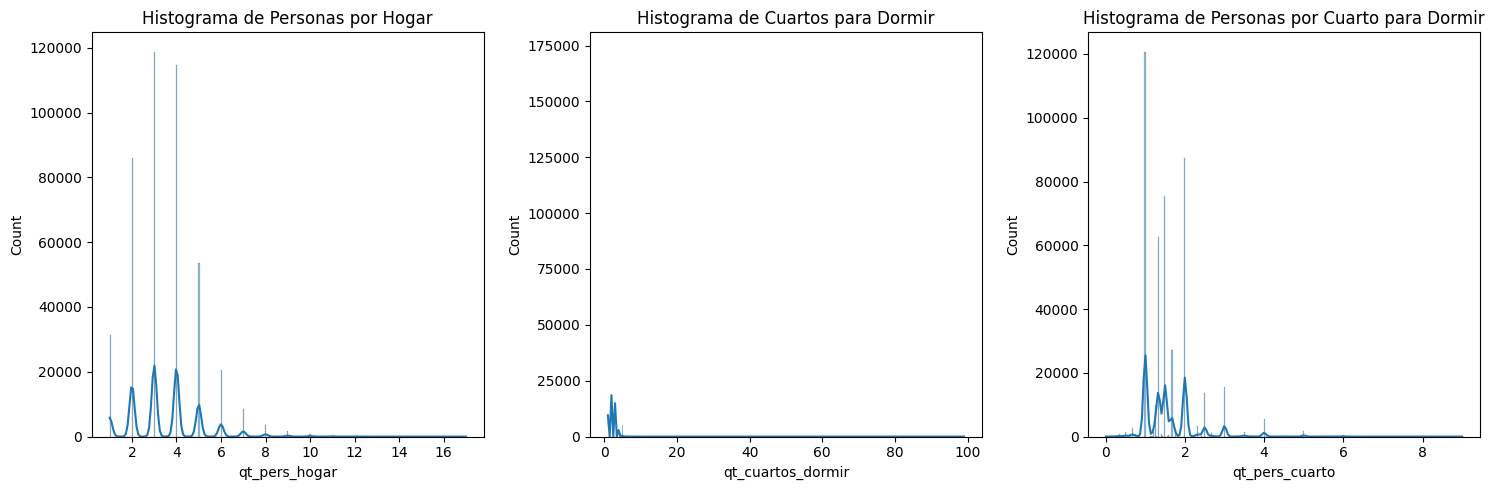

In [ ]:
# Crear subplots para mostrar los histogramas uno al lado del otro
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para 'qt_pers_hogar'
sns.histplot(ax=axes[0], x=df_bogota_cleaned['qt_pers_hogar'], kde=True)
axes[0].set_title('Histograma de Personas por Hogar')

# Histograma para 'qt_cuartos_dormir'
sns.histplot(ax=axes[1], x=df_bogota_cleaned['qt_cuartos_dormir'], kde=True)
axes[1].set_title('Histograma de Cuartos para Dormir')

# Histograma para 'qt_pers_cuarto'
sns.histplot(ax=axes[2], x=df_bogota_cleaned['qt_pers_cuarto'], kde=True)
axes[2].set_title('Histograma de Personas por Cuarto para Dormir')

plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()


In [ ]:
# missing_values = df_bogota_cleaned.groupby('edad')['trabajo_nopag_ultm_sem'].apply(lambda x: x.isnull().sum()).reset_index(name='missing_count')

# # Crear la gráfica de líneas
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='edad', y='missing_count', data=missing_values)
# plt.title('Valores faltantes por edad')
# plt.xlabel('Edad')
# plt.ylabel('Cantidad de valores faltantes')
# plt.grid(True)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# missing_values = df_bogota_cleaned.groupby('ocupacion_ultm_sem')['trabajo_nopag_ultm_sem'].apply(lambda x: x.isnull().sum()).reset_index(name='missing_count')

# plt.figure(figsize=(10, 6))
# sns.barplot(x='ocupacion_ultm_sem', y='missing_count', data=missing_values)
# plt.title('Valores faltantes en trabajo_nopag_ultm_sem según ocupacion')
# plt.xlabel('Ocupacion')
# plt.ylabel('Cantidad de valores faltantes')
# plt.grid(axis='y')
# plt.show()

#Definicion de indicadores

Se determinan de acuerdo a las instrucciones en la Nota Metodológica del DANE en relación al cálculo del IPM

In [ ]:
df_bogota_cleaned['bajo_logro_educativo'] = 0
df_bogota_cleaned.loc[df_bogota_cleaned['edad'] >= 15, 'bajo_logro_educativo'] = df_bogota_cleaned['ultm_grado']

df_bogota_cleaned['analfabetismo'] = 0
df_bogota_cleaned.loc[(df_bogota_cleaned['edad'] >= 15) & (df_bogota_cleaned['read_and_write'] == 2), 'analfabetismo'] = 1

df_bogota_cleaned['inasistencia_escolar'] = 0
df_bogota_cleaned.loc[df_bogota_cleaned['edad'].between(6, 16) & (df_bogota_cleaned['estudia'] == 2), 'inasistencia_escolar'] = 1

df_bogota_cleaned['rezago_escolar'] = ((df_bogota_cleaned['edad'].between(7, 17)) &
                                       (df_bogota_cleaned['ultm_grado'] < (df_bogota_cleaned['edad'] - 6))
                                      ).astype(int)

df_bogota_cleaned['mal_cuidado_menor'] = 0
df_bogota_cleaned.loc[(df_bogota_cleaned['edad'] <= 5) & ((df_bogota_cleaned['sssi'] == 2) | df_bogota_cleaned['cuidado_menor'].isin([3,6,7])), 'mal_cuidado_menor'] = 1

df_bogota_cleaned['trabajo_infantil'] = 0
df_bogota_cleaned.loc[df_bogota_cleaned['edad'].between(12,17) & (df_bogota_cleaned['ocupado'] == True), 'trabajo_infantil'] = 1

df_bogota_cleaned['dependencia_economica'] = df_bogota_cleaned['ocupado'].astype(int)

df_bogota_cleaned['empleo_informal'] = 0
df_bogota_cleaned.loc[(df_bogota_cleaned['ocupado'] == True) & (df_bogota_cleaned['pension'] == 2), 'empleo_informal'] = 1

df_bogota_cleaned['sin_salud'] = 0
df_bogota_cleaned.loc[(df_bogota_cleaned['edad'] > 5) & (df_bogota_cleaned['sssi'] == 2), 'sin_salud'] = 1

df_bogota_cleaned['barrera_salud'] = 0
df_bogota_cleaned.loc[(df_bogota_cleaned['enfermo_ultm_mes'] == 1) & df_bogota_cleaned['tratam_enf'].isin([5,6,7,8,9,10]), 'barrera_salud'] = 1

df_bogota_cleaned['sin_agua'] = 0
df_bogota_cleaned.loc[df_bogota_cleaned['acueducto'] == 2, 'sin_agua'] = 1

df_bogota_cleaned['sin_alcantarillado'] = 0
df_bogota_cleaned.loc[df_bogota_cleaned['alcantarillado'] == 2, 'sin_alcantarillado'] = 1

df_bogota_cleaned['pisos_inadecuados'] = 0
df_bogota_cleaned.loc[df_bogota_cleaned['material_pisos'] == 7, 'pisos_inadecuados'] = 1

df_bogota_cleaned['paredes_inadecuadas'] = 0
df_bogota_cleaned.loc[df_bogota_cleaned['material_paredes'].isin([5,7,8,9]), 'paredes_inadecuadas'] = 1

df_bogota_cleaned['hacinamiento'] = 0
df_bogota_cleaned.loc[df_bogota_cleaned['per_por_cuarto'] >= 3, 'hacinamiento'] = 1

# print(df_bogota_cleaned[df_bogota_cleaned['directorio_hog'] == 1115891]['cod_upz'])

Se calculan el IPM para cada uno de los hogares

In [ ]:
# 1) Define los grupos de columnas según la función de agregación:
count_cols = [
    'analfabetismo', 'inasistencia_escolar', 'mal_cuidado_menor',
    'trabajo_infantil', 'empleo_informal', 'sin_salud',
    'barrera_salud', 'rezago_escolar', 'dependencia_economica'
]

mode_cols = [
    'sin_agua', 'sin_alcantarillado',
    'pisos_inadecuados', 'paredes_inadecuadas',
    'hacinamiento', 'cod_upz', 'fex_c', 'qt_pers_hogar', 'año_em'
]

# La columna que se promedia:
mean_col = 'bajo_logro_educativo'

# 2) Construye el diccionario de agregaciones:
agg_dict = {col: 'sum' for col in count_cols}
agg_dict.update({col: (lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
                 for col in mode_cols})
agg_dict[mean_col] = 'mean'

# 3) Aplica el groupby y la agregación:
indicadores = (
    df_bogota_cleaned
    .groupby('directorio_hog')
    .agg(agg_dict)
    .reset_index()
)
# print(indicadores.head())

tamano_hogares = df_bogota_cleaned.groupby('directorio_hog').size()
indicadores['tamano_hogar'] = indicadores['directorio_hog'].map(tamano_hogares)

indicadores['prop_dependencia_economica'] = indicadores['tamano_hogar'] / indicadores['dependencia_economica']

# print(indicadores[['dependencia_economica', 'prop_dependencia_economica']].head())

In [ ]:
# print(indicadores[indicadores['directorio_hog'] == 1115891].iloc[0].to_dict())

Se definen los criterios para determinar, por cada componente, si hay propension a pobreza. Si se obtiene un puntaje igual o mayor al 0.333, se determina que el hogar es pobre

# Calculo del IPM

In [ ]:
criteria = {
    'bajo_logro_educativo' : (0.10, lambda x: x <  9),
    'analfabetismo'        : (0.10, lambda x: x >  0),
    'inasistencia_escolar' : (0.05, lambda x: x >  0),
    'rezago_escolar'       : (0.05, lambda x: x >  0),
    'mal_cuidado_menor'    : (0.05, lambda x: x >  0),
    'trabajo_infantil'     : (0.05, lambda x: x >  0),
    'prop_dependencia_economica': (0.10, lambda x: x >= 3),
    'empleo_informal'      : (0.10, lambda x: x >  0),
    'sin_salud'            : (0.10, lambda x: x >  0),
    'barrera_salud'        : (0.10, lambda x: x >  0),
    'sin_agua'             : (0.04, lambda x: x >  0),
    'sin_alcantarillado'   : (0.04, lambda x: x >  0),
    'pisos_inadecuados'    : (0.04, lambda x: x >  0),
    'paredes_inadecuadas'  : (0.04, lambda x: x >  0),
    'hacinamiento'         : (0.04, lambda x: x >  0)
}

for col, (peso, cond) in criteria.items():
    indicadores[f'{col}_score'] = (
        indicadores[col]
        .apply(cond)        # True/False según la condición
        .astype(int)        # 1 o 0
        * peso              # multiplica por su peso
    )

score_cols = [f'{col}_score' for col in criteria]
indicadores['IPM'] = indicadores[score_cols].sum(axis=1)
# indicadores['IPM'] = (indicadores['IPM'] - 0.02).clip(lower=0)

indicadores['pobre'] = (indicadores['IPM'] >= 0.333).astype(int)

# print(indicadores.head(5))
print(indicadores.head())

   directorio_hog  analfabetismo  inasistencia_escolar  mal_cuidado_menor  \
0         1010001              0                     0                  0   
1         1010011              0                     0                  0   
2         1010021              0                     0                  0   
3         1010031              0                     0                  0   
4         1010041              0                     0                  0   

   trabajo_infantil  empleo_informal  sin_salud  barrera_salud  \
0                 0                1          0              0   
1                 0                0          0              1   
2                 0                0          0              0   
3                 0                1          0              0   
4                 0                0          0              0   

   rezago_escolar  dependencia_economica  ...  empleo_informal_score  \
0               0                      3  ...                    0.1

# Agrupacion de UPZ por localidad

Se usa un archivo adicional para mapear el código de localidad de cada una de las encuestas, de acuerdo con su respectivo código de upz.

In [ ]:
# indicadores['cod_upz'] = indicadores['cod_upz'].astype(int)
localidad_upz = pd.read_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/poblacion-upz-bogota-limpio.xlsx')
print(localidad_upz.head())
indicadores = pd.merge(indicadores, localidad_upz[['cod_upz_2017', 'cod_localidad', 'localidad']], left_on='cod_upz', right_on='cod_upz_2017', how='left')
# print(indicadores_loc[indicadores_loc['localidad'].isna()][['directorio_hog', 'empleo_informal_score']])
#
# print(indicadores.head())

   cod_localidad      localidad  cod_upz          upz  cod_upz_2017  \
0              2      CHAPINERO       90  PARDO RUBIO           816   
1              3       SANTA FE       96      LOURDES            96   
2              4  SAN CRISTOBAL       50    LA GLORIA            50   
3              5           USME       61  CIUDAD USME           811   
4              6     TUNJUELITO       42      VENECIA            42   

                             upz_2017  
0  CHAPINERO: Pardo Rubio + Chapinero  
1                             LOURDES  
2                           LA GLORIA  
3   USME: Alfonso López + Ciudad Usme  
4                             VENECIA  


Se separan los conjuntos de datos por año

In [ ]:
indicadores_2017 = indicadores[indicadores['año_em'] == 2017]
indicadores_2021 = indicadores[indicadores['año_em'] == 2021]
print(indicadores_2017.head())
print(indicadores_2021.head())
# print(len(indicadores_2021['cod_upz'].unique()))

   directorio_hog  analfabetismo  inasistencia_escolar  mal_cuidado_menor  \
0         1010001              0                     0                  0   
1         1010011              0                     0                  0   
2         1010021              0                     0                  0   
3         1010031              0                     0                  0   
4         1010041              0                     0                  0   

   trabajo_infantil  empleo_informal  sin_salud  barrera_salud  \
0                 0                1          0              0   
1                 0                0          0              1   
2                 0                0          0              0   
3                 0                1          0              0   
4                 0                0          0              0   

   rezago_escolar  dependencia_economica  ...  sin_agua_score  \
0               0                      3  ...             0.0   
1         

# Distribución de los indicadores agrupados por año y por localidad
Se realiza con el objetivo de identificar el tipo de distirbución que tienen los IPM, buscando determinar cuál será la técnica más óptima que permita estimar el error que permita acercar el IPM calculado con el real

In [ ]:
# 1. Estadísticos descriptivos + tests de normalidad
grouped = indicadores.groupby(['cod_localidad', 'año_em'])['IPM']

# Agregar estadísticas básicas
summary = grouped.agg([
    ('n',        'count'),
    ('mean',     'mean'),
    ('std',      'std'),
    ('min',      'min'),
    ('25%',      lambda x: x.quantile(0.25)),
    ('50%',      'median'),
    ('75%',      lambda x: x.quantile(0.75)),
    ('max',      'max')
]).reset_index()

# Agregar skewness y kurtosis
summary['skewness'] = grouped.apply(lambda x: stats.skew(x.dropna())).values
summary['kurtosis'] = grouped.apply(lambda x: stats.kurtosis(x.dropna(), fisher=False)).values

# Test de Shapiro–Wilk (solo si 3 <= n <= 5000)
def shapiro_p(x):
    x = x.dropna()
    return stats.shapiro(x)[1] if 3 <= len(x) <= 5000 else np.nan

summary['shapiro_p'] = grouped.apply(shapiro_p).values

# Mostrar tabla
print("\n=== Resumen descriptivo y test de normalidad (por región y año) ===\n")
print(summary.to_string(index=False))


# 2. Funciones de graficado
def plot_hist_density(data, title):
    plt.figure(figsize=(6,4))
    plt.hist(data, bins=30, density=True, alpha=0.6)
    kde = stats.gaussian_kde(data)
    xs = np.linspace(data.min(), data.max(), 200)
    plt.plot(xs, kde(xs), lw=2)
    plt.title(title)
    plt.xlabel('IPM')
    plt.ylabel('Densidad')
    plt.tight_layout()
    plt.show()

def plot_box(data, title):
    plt.figure(figsize=(6,2))
    plt.boxplot(data, vert=False)
    plt.title(title)
    plt.xlabel('IPM')
    plt.tight_layout()
    plt.show()

def plot_qq(data, title):
    plt.figure(figsize=(5,5))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.tight_layout()
    plt.show()


# 3. Iterar por cada pareja (región, año) y trazar
for (region, year), group in indicadores.groupby(['cod_localidad', 'año_em']):
    data = group['IPM'].dropna()
    if len(data) < 3:
        continue  # saltar grupos muy pequeños

    title_base = f"Región {region} — Año {year}"
    plot_hist_density(data, f"Histograma + KDE | {title_base}")
    plot_box(data,           f"Boxplot          | {title_base}")
    plot_qq(data,            f"Gráfico Q–Q      | {title_base}")

Output hidden; open in https://colab.research.google.com to view.

# Calculo de porcentajes de personas pobres

## Por personas con factor de expansion

In [ ]:
# # Calcula el número de personas pobres ponderado por hogar
# indicadores['personas_pond'] = indicadores['qt_pers_hogar'] * indicadores['fex_c']
# indicadores['pobres_pond'] = indicadores['personas_pond'] * indicadores['pobre']

# # Agrupa por cod_upz para obtener totales
# resumen = indicadores.groupby('cod_upz').agg(
#     total_personas_ponderadas=('personas_pond', 'sum'),
#     total_pobres_ponderadas=('pobres_pond', 'sum'),
#     año_em=( 'año_em', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan )
# ).reset_index()

# # Calcula el porcentaje
# resumen['porc_calculado'] = (
#     resumen['total_pobres_ponderadas'] / resumen['total_personas_ponderadas']
# ) * 100
# resumen['cod_upz'] = resumen['cod_upz'].astype(int)
# resumen = resumen[['cod_upz', 'porc_calculado', 'año_em']]
# resumen['cod_upz'] = resumen['cod_upz'].astype("string")
# resumen['año_em'] = resumen['año_em'].astype("string")
# resumen['upz_año'] = resumen['cod_upz'] + '_' + resumen['año_em']

# print(resumen.head())

## Por hogares con factor de expansion

In [ ]:
# indicadores['hogares_ponderados'] = indicadores['fex_c']
# indicadores['hogares_pobres_ponderados'] = indicadores['fex_c'] * indicadores['pobre']

# # 3. Agrupamos por UPZ
# resumen = indicadores.groupby('cod_upz').agg(
#     total_hogares_ponderados=('hogares_ponderados', 'sum'),
#     total_hogares_pobres_ponderados=('hogares_pobres_ponderados', 'sum'),
#     año_em=( 'año_em', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan )
# ).reset_index()

# # 4. Calculamos el porcentaje de hogares pobres
# resumen['porc_calculado'] = (
#     resumen['total_hogares_pobres_ponderados'] /
#     resumen['total_hogares_ponderados']
# ) * 100

# # 5. Dejar sólo columnas relevantes
# resumen['cod_upz'] = resumen['cod_upz'].astype(int)
# resumen = resumen[['cod_upz', 'porc_calculado', 'año_em']]
# resumen['cod_upz'] = resumen['cod_upz'].astype("string")
# resumen['año_em'] = resumen['año_em'].astype("string")
# resumen['upz_año'] = resumen['cod_upz'] + '_' + resumen['año_em']

# print(resumen.head())

## Por hogares sin factor de expansion
Se agrupan los datos por localidad y año, con el objetivo de determinar el porcentaje de hogares con condición de pobreza con respecto al total de hogares en cada localidad y por cada año.

In [ ]:
# 1. Asumimos que la columna 'pobre' ya indica si el hogar es pobre (1) o no (0)

# 2. Agrupar por cod_upz
resumen = indicadores.groupby(['cod_localidad', 'año_em']).agg(
    total_hogares=('directorio_hog', 'count'),
    total_hogares_pobres=('pobre', 'sum')
).reset_index()

# print(resumen[resumen['cod_upz'] == 801].head())

# 3. Calcular porcentaje de hogares pobres
resumen['porc_calculado'] = (
    (resumen['total_hogares_pobres'] / resumen['total_hogares'])*100
)

# 4. Formatear el resultado
resumen['cod_localidad'] = resumen['cod_localidad'].astype(int)
resumen['cod_localidad'] = resumen['cod_localidad'].astype("string")
resumen['año_em'] = resumen['año_em'].astype("string")
resumen['localidad_año'] = resumen['cod_localidad'] + '_' + resumen['año_em']
resumen_estimacion = resumen.copy()
# print(resumen_estimacion[resumen_estimacion['cod_localidad'] == '801'].head())
resumen = resumen[['localidad_año', 'porc_calculado', 'año_em']]

print(resumen.head())

  localidad_año  porc_calculado año_em
0        1_2017        5.643257   2017
1        1_2021        4.249155   2021
2        2_2017        3.908579   2017
3        2_2021        4.942717   2021
4        3_2017       10.024096   2017


# IPM calculado directamente por el DANE, haciendo uso del EM
Se importa el df que contiene el porcentaje real de personas en condición de pobreza para el año 2017 y 2021, calculados oficialmente por el DANE.

In [ ]:
calculated_ipm = pd.read_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/IPM real EM.xlsx', sheet_name = 'Localidad', skiprows = 8)

In [ ]:
calculated_ipm_clean = calculated_ipm[(calculated_ipm['Variable'] == 'IPM') &
                                      (calculated_ipm['Clase'] == 'Urbano') &
                                      (calculated_ipm['Año'].isin([2017, 2021]))][['Código localidad', 'Nombre localidad', 'Valor', 'Año']]
calculated_ipm_clean = calculated_ipm_clean.rename(columns={'Valor': 'porc_real', 'Código localidad':'cod_localidad'})
calculated_ipm_clean['porc_real'] = calculated_ipm_clean['porc_real']#/100
calculated_ipm_clean['cod_localidad'] = calculated_ipm_clean['cod_localidad'].astype("string")
calculated_ipm_clean['Año'] = calculated_ipm_clean['Año'].astype("string")
calculated_ipm_clean['localidad_año'] = calculated_ipm_clean['cod_localidad'] + '_' + calculated_ipm_clean['Año']
print(calculated_ipm_clean.head())
# print(calculated_ipm_clean[calculated_ipm_clean['cod_localidad'] == '801'])

     cod_localidad Nombre localidad  porc_real   Año localidad_año
7565             1          Usaquén   2.601154  2017        1_2017
7567             2        Chapinero   1.836760  2017        2_2017
7569             3         Santa Fe   7.954666  2017        3_2017
7571             4    San Cristóbal   7.443774  2017        4_2017
7573             5             Usme  12.230034  2017        5_2017


Se compara el porcentajde personas en condicion de pobreza calculado con el real, para intentar evaluar la diferencia promedio que hay, de manera inicial, antes de hacer uso de un modelo de estimación del error.

In [ ]:
comparativa = pd.merge(resumen, calculated_ipm_clean, on='localidad_año', how='inner')
comparativa['diferencia'] = abs(comparativa['porc_calculado'] - comparativa['porc_real'])
comparativa_2017 = comparativa[comparativa['Año'] == '2017']
comparativa_2021 = comparativa[comparativa['Año'] == '2021']
# print(comparativa.head(10))
# print(comparativa[comparativa['cod_upz'] == '116'])
print(comparativa.head())
# print(comparativa[comparativa['cod_localidad'] == '801'])
print(f"Promedio de los porcentajes reales (2017): {comparativa_2017['porc_real'].mean()}")
print(f"Promedio de los porcentajes reales (2021): {comparativa_2021['porc_real'].mean()}")

print(f"Promedio de los porcentajes calculados (2017): {comparativa_2017['porc_calculado'].mean()}")
print(f"Promedio de los porcentajes calculados (2021): {comparativa_2021['porc_calculado'].mean()}")

  localidad_año  porc_calculado año_em cod_localidad Nombre localidad  \
0        1_2017        5.643257   2017             1          Usaquén   
1        1_2021        4.249155   2021             1          Usaquén   
2        2_2017        3.908579   2017             2        Chapinero   
3        2_2021        4.942717   2021             2        Chapinero   
4        3_2017       10.024096   2017             3         Santa Fe   

   porc_real   Año  diferencia  
0   2.601154  2017    3.042103  
1   2.252160  2021    1.996995  
2   1.836760  2017    2.071819  
3   1.993915  2021    2.948801  
4   7.954666  2017    2.069430  
Promedio de los porcentajes reales (2017): 4.907252509342997
Promedio de los porcentajes reales (2021): 5.49196877291328
Promedio de los porcentajes calculados (2017): 10.405274616130615
Promedio de los porcentajes calculados (2021): 10.824904552298655


# Modelo de estimacion del error

Aqui, se procederá aestimar el error promedio del calculo real con el preliminar a través de la técnica de Quantile‐Matching por región, más una extrapolación lineal.
En lugar de usar un único umbral global (0.33), se ajusta un pequeño desplazamiento (ε_r) para cada región r, de modo que la cantidad de individuos cuya puntuación (indicador) supera 0.33 + ε_r coincida con la cantidad “real” de individuos aptos en esa región. Matemáticamente, para cada región r:

* Sea N_r el número total de individuos en la región en tu base.
* Sea M_r el número “real” de aptos según la revisión manual.
* Ordenas de mayor a menor los valores de indicador_i para i ∈ región r.
* Sea v_r = la puntuación que ocupa la posición M_r (i.e., el M_r-ésimo valor más alto).
* Entonces defines ε_r = v_r – 0.33.

De este modo, cualquier individuo cuya puntaje raw ≥ (0.33 + ε_r) será clasificado como apto y, por construcción, habrá M_r “aptos” en la región r.

Luego, suponiendo que dicho desplazamiento varía (aproximadamente) de forma lineal en el tiempo, se ajustará una línea que pase por (2017, ε<sub>r,2017</sub>) y (2021, ε<sub>r,2021</sub>) y se extiende esa recta hasta el 2014 para obtener ε<sub>r,2014</sub>.

Finalmente, para cada individuo de 2014, se calcula el “indicador_ajustado” = indicador_raw – ε<sub>r,2014</sub> (o comparas indicador_raw ≥ 0.33 + ε<sub>r,2014</sub>).

## Supuestos

Es importante resaltar que se hacen una serie de supuestos para aplicar esta técnica.

* Al tener sólo dos puntos (2017 y 2021), asumir una recta es la manera más simple de modelar la evolución. Por tanto, la extrapolación a 2014 puede desviarse si la tendencia real entre 2014–2017 no fue aproximadamente lineal.
* Al extrapolar a un año anterior, se asume que la forma en que construye el indicador y cómo se distribuye la población no cambió drásticamente antes de 2017.
* Para que el “quantile matching” sea robusto, cada región debería tener un número razonable de casos

In [ ]:
conteo_real = pd.merge(comparativa[['localidad_año', 'Año', 'cod_localidad', 'Nombre localidad', 'porc_real']], resumen_estimacion[['localidad_año', 'total_hogares']], on='localidad_año', how='inner')
conteo_real = conteo_real[['Año', 'cod_localidad', 'Nombre localidad', 'porc_real', 'total_hogares']].copy()
conteo_real['Año'] = conteo_real['Año'].astype(int)
conteo_real['real_pobres'] = (conteo_real['porc_real']/100) * conteo_real['total_hogares']
conteo_real['real_pobres'] = conteo_real['real_pobres'].astype(int)
conteo_real['cod_localidad'] = conteo_real['cod_localidad'].astype(int)
for ind in [indicadores_2017, indicadores_2021]:
  ind['cod_localidad'] = pd.to_numeric(ind['cod_localidad'], errors='coerce').astype(int)
  # ind['cod_localidad'] = ind['cod_localidad'].astype("string")
# print(conteo_real.head())
# print(conteo_real.dtypes)
print(conteo_real[conteo_real['cod_localidad'] == 801])
# print(indicadores_2017.dtypes)

epsilons = []
for year, df_year in [(2017, indicadores_2017), (2021, indicadores_2021)]:
    for cod_localidad, group in df_year.groupby('cod_localidad'):
        # Extraer conteos reales:
        N_r = conteo_real.loc[
            (conteo_real['Año']==year) & (conteo_real['cod_localidad']==cod_localidad),
            'total_hogares'
        ].values[0]
        M_r = conteo_real.loc[
            (conteo_real['Año']==year) & (conteo_real['cod_localidad']==cod_localidad),
            'real_pobres'
        ].values[0]

        # Orden descendente de scores
        scores = np.sort(group['IPM'].values)[::-1]
        # Asegurarse de que M_r esté entre 1 y len(scores)
        M_r = min(max(int(M_r), 1), len(scores))

        v_rt = scores[M_r - 1]  # Python index: M_r-1
        eps_rt = v_rt - 0.33
        epsilons.append({
            'Año': year,
            'cod_localidad': cod_localidad,
            'epsilon': eps_rt
        })

eps_df = pd.DataFrame(epsilons)
print(eps_df.head())
maximo = eps_df['epsilon'].max()
minimo = eps_df['epsilon'].min()
print("Maximo:", maximo)
print("Minimo:", minimo)

Empty DataFrame
Columns: [Año, cod_localidad, Nombre localidad, porc_real, total_hogares, real_pobres]
Index: []
    Año  cod_localidad  epsilon
0  2017              1     0.02
1  2017              2     0.02
2  2017              3     0.02
3  2017              4     0.02
4  2017              5     0.02
Maximo: 0.07
Minimo: 0.019999999999999962


/tmp/ipython-input-1894710484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['cod_localidad'] = pd.to_numeric(ind['cod_localidad'], errors='coerce').astype(int)
/tmp/ipython-input-1894710484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind['cod_localidad'] = pd.to_numeric(ind['cod_localidad'], errors='coerce').astype(int)


## Para 2017

In [ ]:
# 2) Para 2017:
#    Filtramos solo las filas de eps_df correspondientes a year=2017
eps_2017 = eps_df[eps_df['Año'] == 2017][['cod_localidad', 'epsilon']].rename(columns={'epsilon':'eps_2017'})

#    Ahora 'eps_2017' tiene 2 columnas: ['region', 'eps_2017'].

# 3) Mezclamos con df2017, de modo que cada individuo en 2017 reciba
#    la columna 'eps_2017' según su región.
df2017_valid = (
    indicadores_2017
    .merge(eps_2017, how='left', on='cod_localidad')
)

# 4) Calculamos para cada fila de df2017 su indicador_ajustado:
#    indicator_adj = indicator_raw - eps_2017
df2017_valid['IPM_ajus'] = df2017_valid['IPM'] - df2017_valid['eps_2017']

In [ ]:
# 5) Clasificar “apto” si indicator_adj >= 0.33
df2017_valid['pobre_ajus'] = (df2017_valid['IPM_ajus'] >= 0.333).astype(int)

# 6) Ahora resumimos por región:
summary_2017 = (
    df2017_valid
    .groupby('cod_localidad')
    .agg(
        total_hogares_2017=('directorio_hog', 'count'),
        pobres_estim_2017=('pobre_ajus', 'sum')
    )
    .reset_index()
)

# 7) Unimos con real_counts para comparar
real_2017 = conteo_real[conteo_real['Año'] == 2017][['cod_localidad', 'real_pobres']]

# Renombramos para evitar ambigüedades:
real_2017 = real_2017.rename(columns={'real_pobres':'pobres_real_2017'})

comparison_2017 = (
    summary_2017
    .merge(real_2017, how='left', on='cod_localidad')
)

# 8) Calculamos porcentaje estimado vs. real
comparison_2017['pobres_%_estimado_2017'] = (
    (comparison_2017['pobres_estim_2017'] / comparison_2017['total_hogares_2017'])*100
)
comparison_2017['pobres_%_real_2017'] = (
    (comparison_2017['pobres_real_2017'] / comparison_2017['total_hogares_2017'])*100
)

# # 9) Podrías también crear una columna de diferencia absoluta o relativa:
comparison_2017['diff_pobres_%_rel_2017'] = abs(comparison_2017['pobres_%_estimado_2017'] - comparison_2017['pobres_%_real_2017'])

print(comparison_2017.head())
print(comparison_2017['pobres_%_estimado_2017'].mean())
print(comparison_2017['pobres_%_real_2017'].mean())
print(comparison_2017['diff_pobres_%_rel_2017'].mean())

   cod_localidad  total_hogares_2017  pobres_estim_2017  pobres_real_2017  \
0              1                8045                190               209   
1              2                3019                 46                55   
2              3                4150                164               330   
3              4                4035                212               300   
4              5                4984                456               609   

   pobres_%_estimado_2017  pobres_%_real_2017  diff_pobres_%_rel_2017  
0                2.361715            2.597887                0.236172  
1                1.523683            1.821795                0.298112  
2                3.951807            7.951807                4.000000  
3                5.254027            7.434944                2.180917  
4                9.149278           12.219101                3.069823  
3.7107624102803753
4.892947291967194
1.1821848816868192


## Para 2021

In [ ]:
# 2) Para 2021:
#    Filtramos solo las filas de eps_df correspondientes a year=2021
eps_2021 = eps_df[eps_df['Año'] == 2021][['cod_localidad', 'epsilon']].rename(columns={'epsilon':'eps_2021'})

#    Ahora 'eps_2021' tiene 2 columnas: ['region', 'eps_2021'].

# 3) Mezclamos con df2021, de modo que cada individuo en 2021 reciba
#    la columna 'eps_2021' según su región.
df2021_valid = (
    indicadores_2021
    .merge(eps_2021, how='left', on='cod_localidad')
)

# 4) Calculamos para cada fila de 2021 su indicador_ajustado:
#    indicator_adj = indicator_raw - eps_2021
df2021_valid['IPM_ajus'] = df2021_valid['IPM'] - df2021_valid['eps_2021']

In [ ]:
# 5) Clasificar “apto” si indicator_adj >= 0.33
df2021_valid['pobre_ajus'] = (df2021_valid['IPM_ajus'] >= 0.333).astype(int)

# 6) Ahora resumimos por región:
summary_2021 = (
    df2021_valid
    .groupby('cod_localidad')
    .agg(
        total_hogares_2021=('directorio_hog', 'count'),
        pobres_estim_2021=('pobre_ajus', 'sum')
    )
    .reset_index()
)

# 7) Unimos con real_counts para comparar
real_2021 = conteo_real[conteo_real['Año'] == 2021][['cod_localidad', 'real_pobres']]

# Renombramos para evitar ambigüedades:
real_2021 = real_2021.rename(columns={'real_pobres':'pobres_real_2021'})

comparison_2021 = (
    summary_2021
    .merge(real_2021, how='left', on='cod_localidad')
)

# 8) Calculamos porcentaje estimado vs. real
comparison_2021['pobres_%_estimado_2021'] = (
    (comparison_2021['pobres_estim_2021'] / comparison_2021['total_hogares_2021'])*100
)
comparison_2021['pobres_%_real_2021'] = (
    (comparison_2021['pobres_real_2021'] / comparison_2021['total_hogares_2021'])*100
)

# # 9) Podrías también crear una columna de diferencia absoluta o relativa:
comparison_2021['diff_pobres_%_rel_2021'] = abs(comparison_2021['pobres_%_estimado_2021'] - comparison_2021['pobres_%_real_2021'])

print(comparison_2021.head())
print(comparison_2021['pobres_%_estimado_2021'].mean())
print(comparison_2021['pobres_%_real_2021'].mean())
print(comparison_2021['diff_pobres_%_rel_2021'].mean())

   cod_localidad  total_hogares_2021  pobres_estim_2021  pobres_real_2021  \
0              1               14497                249               326   
1              2                6110                 80               121   
2              3                4896                295               511   
3              4                4363                205               264   
4              5                5378                576               682   

   pobres_%_estimado_2021  pobres_%_real_2021  diff_pobres_%_rel_2021  
0                1.717597            2.248741                0.531144  
1                1.309329            1.980360                0.671031  
2                6.025327           10.437092                4.411765  
3                4.698602            6.050882                1.352281  
4               10.710301           12.681294                1.970993  
4.371331563889269
5.476508864535939
1.1051773006466703


In [ ]:
# Unimos epsilon 2017 y 2021 en filas separadas; luego pivotamos:
pivot_eps = eps_df.pivot(index='cod_localidad', columns='Año', values='epsilon').reset_index()
print(pivot_eps.head())
pivot_eps = pivot_eps.rename(columns={2017: 'eps_2017', 2021: 'eps_2021'})
print(pivot_eps.head())

# Calcular pendiente m_r y c_r para cada región
def compute_line_params(row):
    t1, t2 = 2017, 2021
    e1, e2 = row['eps_2017'], row['eps_2021']
    m_r = (e2 - e1) / (t2 - t1)
    c_r = e1 - m_r * t1
    return pd.Series({'m_r': m_r, 'c_r': c_r})

line_params = pivot_eps.apply(compute_line_params, axis=1)
pivot_eps = pd.concat([pivot_eps, line_params], axis=1)

# Calcular epsilon estimado para 2014:
pivot_eps['eps_2014_hat'] = pivot_eps['m_r'] * 2014 + pivot_eps['c_r']


Año  cod_localidad  2017  2021
0                1  0.02  0.02
1                2  0.02  0.07
2                3  0.02  0.02
3                4  0.02  0.02
4                5  0.02  0.06
Año  cod_localidad  eps_2017  eps_2021
0                1      0.02      0.02
1                2      0.02      0.07
2                3      0.02      0.02
3                4      0.02      0.02
4                5      0.02      0.06


# Aplicación del modelo
## Para 2014
NOTA: En la encuesta de 2014, para la pregunta NVCBP13 (material pisos), la opcion 1 y 5, posteriormente, se unen en la opcion 4 de las otras 2 encuestas.

Se aplicarán las mismas reglas de limpieza de datos faltantes y transformación para calcular el IPM por hogar. Y así luego calcular el porcentaje de personas en condición de pobreza por localidad.

In [ ]:
df_2014 = pd.read_csv('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/em2014_cleaned.csv')
df_2014 = df_2014.rename(columns={'cod_mpio': 'divipola_cod',
                        'nvcbp11b': 'acueducto',
                        'nvcbp11c':'alcantarillado',
                        'nvcbp12':'material_paredes',
                        'nvcbp13': 'material_pisos',
                        'nhccp18': 'qt_pers_hogar',
                        'nhccp20': 'qt_cuartos_dormir',
                        'npcfp1': 'sssi',
                        'npcfp16': 'enfermo_ultm_mes',
                        'npcfp19': 'tratam_enf',
                        'npcgp13': 'lugar_cuidado_menor',
                        'npcgp18': 'persona_cuidado_menor',
                        'npchp1': 'read_and_write',
                        'npchp4': 'ultm_grado',
                        'npckp50': 'pension',
                        'npcep4': 'edad',
                        'npchp2': 'estudia',
                        'npckp1': 'ocupacion_ultm_sem',
                        'npckp2': 'activ_pag_ultm_sem',
                        'npckp3': 'trabajo_ultm_sem',
                        'npckp4': 'trabajo_nopag_ultm_sem',
                        'nvcap4': 'cod_localidad'})
df_2014['año_em'] = 2014

df_2014_bogota = df_2014[df_2014['divipola_cod'] == 11001].copy()

df_2014_bogota_cleaned = df_2014_bogota.dropna(subset=['cod_localidad']).copy()

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['lugar_cuidado_menor'].isna() & (df_2014_bogota_cleaned['edad'] >= 5), 'lugar_cuidado_menor'] = 99 #No aplica para personas de 5 años o mas
df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['persona_cuidado_menor'].isna() & (df_2014_bogota_cleaned['edad'] >= 5), 'persona_cuidado_menor'] = 99 #No aplica para personas de 5 años o mas

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['tratam_enf'].isna() & (df_2014_bogota_cleaned['enfermo_ultm_mes'] == 2), 'tratam_enf'] = 99 #No aplica si la persona no reporta haber estado enfermo en el ultimo mes

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['ocupacion_ultm_sem'].isna() & (df_2014_bogota_cleaned['edad'] < 10), 'ocupacion_ultm_sem'] = 99 #La pregunta solo se hace a personas mayores de 10 años

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['trabajo_nopag_ultm_sem'].isna() & ((df_2014_bogota_cleaned['edad'] < 10) |
                      (df_2014_bogota_cleaned['ocupacion_ultm_sem'].isin([1,5]))), 'trabajo_nopag_ultm_sem'] = 99 #No aplica si es de 10 años o menor, o si reporto como actividad principal estar trabajando o si reporta estar incapacitado permanentemente
df_2014_bogota_cleaned['trabajo_nopag_ultm_sem'] = df_2014_bogota_cleaned['trabajo_nopag_ultm_sem'].fillna(98)

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['trabajo_ultm_sem'].isna() & ((df_2014_bogota_cleaned['edad'] < 10) |
                      (df_2014_bogota_cleaned['ocupacion_ultm_sem'].isin([1,5]))), 'trabajo_ultm_sem'] = 99 #No aplica si es de 10 años o menor, o si reporto como actividad principal estar trabajando o si reporta estar incapacitado permanentemente
df_2014_bogota_cleaned['trabajo_ultm_sem'] = df_2014_bogota_cleaned['trabajo_ultm_sem'].fillna(98)

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['activ_pag_ultm_sem'].isna() & ((df_2014_bogota_cleaned['edad'] < 10) |
                      (df_2014_bogota_cleaned['ocupacion_ultm_sem'].isin([1,5]))), 'activ_pag_ultm_sem'] = 99 #No aplica si es de 10 años o menor, o si reporto como actividad principal estar trabajando o si reporta estar incapacitado permanentemente

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['pension'].isna() & (df_2014_bogota_cleaned['edad'] < 15), 'pension'] = 99 #No aplica si es menor de 15 años

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['read_and_write'].isna() & (df_2014_bogota_cleaned['edad'] < 5), 'read_and_write'] = 99 #No aplica para personas de 5 años o menos

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['estudia'].isna() & (df_2014_bogota_cleaned['edad'] < 5), 'estudia'] = 99 #No aplica para personas de 5 años o menos

df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['ultm_grado'].isna() &
                      ((df_2014_bogota_cleaned['edad'] < 5) |
                      (df_2014_bogota_cleaned['estudia'] == 1)), 'ultm_grado'] = 0 #No aplica para personas de 5 años o menos, o si reporta que se encuentra estudiando

df_2014_bogota_cleaned['ocupado'] = ((df_2014_bogota_cleaned['ocupacion_ultm_sem'] == 1) |
                                (df_2014_bogota_cleaned['trabajo_nopag_ultm_sem'] == 1) |
                                (df_2014_bogota_cleaned['trabajo_ultm_sem'] == 1) |
                                (df_2014_bogota_cleaned['activ_pag_ultm_sem'] == 1))

df_2014_bogota_cleaned['per_por_cuarto'] = df_2014_bogota_cleaned['qt_pers_hogar'] / df_2014_bogota_cleaned['qt_cuartos_dormir']

In [ ]:
post_faltantes_2014 = df_2014_bogota_cleaned.isnull().sum().to_frame(name='faltantes')
post_faltantes_2014['%'] = (post_faltantes_2014['faltantes'] / len(df_2014_bogota_cleaned)) * 100
post_faltantes_2014 = post_faltantes_2014.sort_values(by='faltantes', ascending=False)

print(post_faltantes_2014)

                        faltantes    %
directorio_hog                  0  0.0
directorio_per                  0  0.0
edad                            0  0.0
ultm_grado                      0  0.0
read_and_write                  0  0.0
estudia                         0  0.0
lugar_cuidado_menor             0  0.0
persona_cuidado_menor           0  0.0
ocupacion_ultm_sem              0  0.0
activ_pag_ultm_sem              0  0.0
trabajo_ultm_sem                0  0.0
trabajo_nopag_ultm_sem          0  0.0
pension                         0  0.0
sssi                            0  0.0
enfermo_ultm_mes                0  0.0
tratam_enf                      0  0.0
acueducto                       0  0.0
alcantarillado                  0  0.0
material_pisos                  0  0.0
material_paredes                0  0.0
qt_cuartos_dormir               0  0.0
qt_pers_hogar                   0  0.0
cod_localidad                   0  0.0
divipola_cod                    0  0.0
fex_c                    

In [ ]:
df_2014_bogota_cleaned['cuidado_menor'] = ((df_2014_bogota_cleaned['lugar_cuidado_menor'] == 3) | #Si el infante pasa la mayor parte del dia en un lugar de trabajo
                                           ((df_2014_bogota_cleaned['lugar_cuidado_menor'] == 1) & (df_2014_bogota_cleaned['persona_cuidado_menor'] == 4))) #Si el infante pasa la mayor parte del dia en casa solo

df_2014_bogota_cleaned['bajo_logro_educativo'] = 0
df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['edad'] >= 15, 'bajo_logro_educativo'] = df_2014_bogota_cleaned['ultm_grado']

df_2014_bogota_cleaned['analfabetismo'] = 0
df_2014_bogota_cleaned.loc[(df_2014_bogota_cleaned['edad'] >= 15) & (df_2014_bogota_cleaned['read_and_write'] == 2), 'analfabetismo'] = 1

df_2014_bogota_cleaned['inasistencia_escolar'] = 0
df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['edad'].between(6, 16) & (df_2014_bogota_cleaned['estudia'] == 2), 'inasistencia_escolar'] = 1

df_2014_bogota_cleaned['rezago_escolar'] = ((df_2014_bogota_cleaned['edad'].between(7, 17)) &
                                       (df_2014_bogota_cleaned['ultm_grado'] < (df_2014_bogota_cleaned['edad'] - 6))
                                      ).astype(int)

df_2014_bogota_cleaned['mal_cuidado_menor'] = 0
df_2014_bogota_cleaned.loc[(df_2014_bogota_cleaned['edad'] <= 5) & ((df_2014_bogota_cleaned['sssi'] == 2) | (df_2014_bogota_cleaned['cuidado_menor'] == True)), 'mal_cuidado_menor'] = 1

df_2014_bogota_cleaned['trabajo_infantil'] = 0
df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['edad'].between(12,17) & (df_2014_bogota_cleaned['ocupado'] == True), 'trabajo_infantil'] = 1

df_2014_bogota_cleaned['dependencia_economica'] = df_2014_bogota_cleaned['ocupado'].astype(int)

df_2014_bogota_cleaned['empleo_informal'] = 0
df_2014_bogota_cleaned.loc[(df_2014_bogota_cleaned['ocupado'] == True) & (df_2014_bogota_cleaned['pension'] == 2), 'empleo_informal'] = 1

df_2014_bogota_cleaned['sin_salud'] = 0
df_2014_bogota_cleaned.loc[(df_2014_bogota_cleaned['edad'] > 5) & (df_2014_bogota_cleaned['sssi'] == 2), 'sin_salud'] = 1

df_2014_bogota_cleaned['barrera_salud'] = 0
df_2014_bogota_cleaned.loc[(df_2014_bogota_cleaned['enfermo_ultm_mes'] == 1) & df_2014_bogota_cleaned['tratam_enf'].isin([5,6,7,8,9,10]), 'barrera_salud'] = 1

df_2014_bogota_cleaned['sin_agua'] = 0
df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['acueducto'] == 2, 'sin_agua'] = 1

df_2014_bogota_cleaned['sin_alcantarillado'] = 0
df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['alcantarillado'] == 2, 'sin_alcantarillado'] = 1

df_2014_bogota_cleaned['pisos_inadecuados'] = 0
df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['material_pisos'] == 7, 'pisos_inadecuados'] = 1

df_2014_bogota_cleaned['paredes_inadecuadas'] = 0
df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['material_paredes'].isin([5,7,8,9]), 'paredes_inadecuadas'] = 1

df_2014_bogota_cleaned['hacinamiento'] = 0
df_2014_bogota_cleaned.loc[df_2014_bogota_cleaned['per_por_cuarto'] >= 3, 'hacinamiento'] = 1

In [ ]:
mode_cols_2014 = [
    'sin_agua', 'sin_alcantarillado',
    'pisos_inadecuados', 'paredes_inadecuadas',
    'hacinamiento', 'cod_localidad', 'fex_c', 'qt_pers_hogar', 'año_em'
]

# 2) Construye el diccionario de agregaciones:
agg_dict_2014 = {col: 'sum' for col in count_cols}
agg_dict_2014.update({col: (lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
                 for col in mode_cols_2014})
agg_dict_2014[mean_col] = 'mean'

# 3) Aplica el groupby y la agregación:
indicadores_2014 = (
    df_2014_bogota_cleaned
    .groupby('directorio_hog')
    .agg(agg_dict_2014)
    .reset_index()
)
# print(indicadores.head())

tamano_hogares_2014 = df_2014_bogota_cleaned.groupby('directorio_hog').size()
indicadores_2014['tamano_hogar'] = indicadores_2014['directorio_hog'].map(tamano_hogares_2014)

indicadores_2014['prop_dependencia_economica'] = indicadores_2014['tamano_hogar'] / indicadores_2014['dependencia_economica']

for col, (peso, cond) in criteria.items():
    indicadores_2014[f'{col}_score'] = (
        indicadores_2014[col]
        .apply(cond)        # True/False según la condición
        .astype(int)        # 1 o 0
        * peso              # multiplica por su peso
    )

score_cols = [f'{col}_score' for col in criteria]
indicadores_2014['IPM'] = indicadores_2014[score_cols].sum(axis=1)
indicadores_2014['pobre'] = (indicadores_2014['IPM'] >= 0.333).astype(int)
# indicadores_2014['IPM'] = (indicadores_2014['IPM'] - 0.02).clip(lower=0)

In [ ]:
print(indicadores_2014.head())
print(indicadores_2014.dtypes)

   directorio_hog  analfabetismo  inasistencia_escolar  mal_cuidado_menor  \
0          100011              0                     0                  0   
1          100021              0                     0                  0   
2          100031              0                     0                  0   
3          100041              0                     0                  0   
4          100061              0                     0                  0   

   trabajo_infantil  empleo_informal  sin_salud  barrera_salud  \
0                 0                1          1              0   
1                 0                0          0              1   
2                 0                1          0              0   
3                 0                0          0              0   
4                 0                0          0              0   

   rezago_escolar  dependencia_economica  ...  empleo_informal_score  \
0               0                      1  ...                    0.1

Finalmente, se aplica el error (epsilon) calculado a cada una de las localidades y se determina el

**porcentaje "real" = porcentaje "calculado +- error**

In [ ]:
df2014_valid = indicadores_2014.copy()

# Unimos ε estimado con df2014 por region:
df2014_valid = df2014_valid.merge(
    pivot_eps[['cod_localidad', 'eps_2014_hat']],
    on='cod_localidad', how='left'
)

# Calculamos el indicador ajustado y la clasificación final
df2014_valid['IPM_ajustado'] = df2014_valid['IPM'] - df2014_valid['eps_2014_hat']
df2014_valid['pobre'] = (df2014_valid['IPM'] >= 0.333).astype(int)
df2014_valid['pobre_ajus'] = (df2014_valid['IPM_ajustado'] >= 0.333).astype(int)

# Ahora puedes contar cuántos aptos predices en 2014 por región:
summary_2014 = df2014_valid.groupby('cod_localidad').agg(
    N_hogares_pobres_inicial_2014=('pobre', 'sum'),
    N_hogares_pobres_pred_2014=('pobre_ajus', 'sum'),
    N_total_hogares_2014=('directorio_hog', 'count')
).reset_index()

summary_2014['pct_pobres_inicial_2014'] = (
    (summary_2014['N_hogares_pobres_inicial_2014'] / summary_2014['N_total_hogares_2014'])*100
)
summary_2014['pct_pobres_predicho_2014'] = (
    (summary_2014['N_hogares_pobres_pred_2014'] / summary_2014['N_total_hogares_2014'])*100
)

print(summary_2014)
print(summary_2014['pct_pobres_inicial_2014'].mean())
print(summary_2014['pct_pobres_predicho_2014'].mean())

    cod_localidad  N_hogares_pobres_inicial_2014  N_hogares_pobres_pred_2014  \
0               1                             88                          37   
1               2                             65                          67   
2               3                            218                         129   
3               4                            173                          84   
4               5                            291                         301   
5               6                            178                         182   
6               7                            267                         137   
7               8                            151                         152   
8               9                            138                          51   
9              10                            143                          31   
10             11                            148                          73   
11             12                       

In [ ]:
summary_2014.to_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/summary_2014.xlsx', index=False)
summary_2017.to_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/summary_2017.xlsx', index=False)
summary_2021.to_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/summary_2021.xlsx', index=False)

# Resumen de los datos


## Por localidad

In [ ]:
resumen_total = pd.merge(comparison_2021[['cod_localidad', 'pobres_%_real_2021']], comparison_2017[['cod_localidad', 'pobres_%_real_2017']], on='cod_localidad', how='inner')
resumen_total = pd.merge(resumen_total, summary_2014[['cod_localidad', 'pct_pobres_predicho_2014']], on='cod_localidad', how='inner')
print(resumen_total.head())

   cod_localidad  pobres_%_real_2021  pobres_%_real_2017  \
0              1            2.248741            2.597887   
1              2            1.980360            1.821795   
2              3           10.437092            7.951807   
3              4            6.050882            7.434944   
4              5           12.681294           12.219101   

   pct_pobres_predicho_2014  
0                  3.410138  
1                  4.224464  
2                 12.285714  
3                  9.261301  
4                 26.827094  


## Por UPZ

In [ ]:
ipm_upz = pd.read_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/IPM real EM.xlsx', sheet_name = 'UPZ', skiprows = 8)

In [ ]:
ipm_real_upz = ipm_upz[(ipm_upz['Variable'] == 'IPM') &
                            (ipm_upz['Clase'] == 'Urbano')][['Código UPZ', 'Nombre UPZ', 'Valor', 'Año']]
ipm_real_upz = ipm_real_upz.rename(columns={'Valor': 'porc_real', 'Código UPZ':'cod_upz'})
ipm_real_upz['cod_upz'] = ipm_real_upz['cod_upz'].astype("string")
print(ipm_real_upz.head())

     cod_upz                                         Nombre UPZ  porc_real  \
4        817                 CHAPINERO: Chicó Lago + El Refugio   0.302146   
216      817                 CHAPINERO: Chicó Lago + El Refugio   0.643683   
509      816                 CHAPINERO: Pardo Rubio + Chapinero   1.808674   
725      816                 CHAPINERO: Pardo Rubio + Chapinero   1.109908   
1019     815  CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El M...  11.938819   

       Año  
4     2017  
216   2021  
509   2017  
725   2021  
1019  2017  


In [ ]:
ipm_upz_2014 = (localidad_upz[['cod_localidad', 'cod_upz_2017', 'upz_2017']].merge(summary_2014[['cod_localidad', 'pct_pobres_predicho_2014']], on='cod_localidad', how='left'))
ipm_upz_2014 = ipm_upz_2014.rename(columns={'cod_upz_2017':'cod_upz', 'pct_pobres_predicho_2014':'porc_real', 'upz_2017': 'Nombre UPZ'})
ipm_upz_2014['Año'] = 2014
ipm_upz_2014['cod_upz'] = ipm_upz_2014['cod_upz'].astype("string")
ipm_upz_2014 = ipm_upz_2014.drop(columns=['cod_localidad'])
ipm_real_upz_final = pd.concat([ipm_real_upz, ipm_upz_2014], axis=0, ignore_index=True)
ipm_real_upz_final

,cod_upz,Nombre UPZ,porc_real,Año
0,817,CHAPINERO: Chicó Lago + El Refugio,0.302146,2017
1,817,CHAPINERO: Chicó Lago + El Refugio,0.643683,2021
2,816,CHAPINERO: Pardo Rubio + Chapinero,1.808674,2017
3,816,CHAPINERO: Pardo Rubio + Chapinero,1.109908,2021
4,815,CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El M...,11.938819,2017
...,...,...,...,...
288,19,EL PRADO,6.437390,2014
289,98,LOS ALCAZARES,9.072581,2014
290,35,CIUDAD JARDIN,2.924634,2014
291,801,RAFAEL URIBE URIBE: Marco Fidel Suárez + San José,5.795678,2014


# Generacion de archivos

Agrupamiento de porcentajes de personas en condicion de pobreza por año y upz

In [ ]:
# ipm_real_upz_final.to_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/IPM real final.xlsx', index=False)

In [ ]:
import re, unicodedata

# Asegura tipos correctos
ipm_real_upz_final['Año'] = ipm_real_upz_final['Año'].astype(int)
def normaliza(s: str) -> str:
    s = unicodedata.normalize('NFKD', str(s))
    s = ''.join(c for c in s if not unicodedata.combining(c))  # quita acentos
    s = s.lower()
    s = re.sub(r'\s+', ' ', s).strip()
    return s

ipm_real_upz_final['Nombre UPZ'] = ipm_real_upz_final['Nombre UPZ'].apply(normaliza)

# Si por combinación (cod_upz, Nombre UPZ, Año) hay un único valor:
ancha = (
    ipm_real_upz_final.pivot_table(index=['cod_upz', 'Nombre UPZ'],
                   columns='Año',
                   values='porc_real',
                   aggfunc='first')            # usa 'sum' o 'mean' si hay duplicados
      .rename(columns=lambda y: f'año_{int(y)}')
      .reset_index()
)

# Ordena columnas por año (opcional)
years = sorted(ipm_real_upz_final['Año'].unique())
ancha = ancha[['cod_upz', 'Nombre UPZ'] + [f'año_{y}' for y in years]]
ancha.columns.name = None
# ancha = ancha.drop(columns=['Año'])

print(ancha)


   cod_upz               Nombre UPZ   año_2014   año_2017   año_2021
0      100                 galerias   0.568643   0.618792   1.424676
1      101              teusaquillo   0.568643   1.102905   0.505949
2      102                la sabana  15.054745   5.262805  10.448105
3      107           quinta paredes   0.568643   0.842559   0.404831
4      109  ciudad salitre oriental   0.568643   0.466556   0.156247
..     ...                      ...        ...        ...        ...
86      92              la macarena  12.285714   5.989468   7.415520
87      94            la candelaria   5.314534   4.478484   5.798608
88      95               las cruces  12.285714   8.600401  10.998462
89      96                  lourdes  12.285714  11.448995  15.280363
90      98            los alcazares   9.072581   0.843809   2.127341

[91 rows x 5 columns]


In [ ]:
# ancha.to_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/IPM total por año.xlsx', index=False)

Tabla total de indicadores para los 3 años

In [ ]:
# print(df2017_valid.dtypes)
# print(df2014.dtypes)

cols_solo_df2017 = set(df2017_valid.columns) - set(df2014_valid.columns)
print("En df1 pero no en cols_solo_df2017:", cols_solo_df2017)

cols_solo_df2014 = set(df2014_valid.columns) - set(df2017_valid.columns)
print("En df2 pero no en cols_solo_df2014:", cols_solo_df2014)

df_final_2017 = df2017_valid.drop(columns=['cod_upz', 'localidad'])
df_final_2021 = df2021_valid.drop(columns=['cod_upz', 'localidad'])
df_final_2017 = df_final_2017.rename(columns={'eps_2017':'error', 'IPM_ajus':'IPM_ajustado', 'cod_upz_2017':'cod_upz'})
df_final_2021 = df_final_2021.rename(columns={'eps_2021':'error', 'IPM_ajus':'IPM_ajustado', 'cod_upz_2017':'cod_upz'})
df_final_2014 = df2014_valid.rename(columns={'eps_2014_hat':'error'})


En df1 pero no en cols_solo_df2017: {'cod_upz_2017', 'eps_2017', 'IPM_ajus', 'localidad', 'cod_upz'}
En df2 pero no en cols_solo_df2014: {'eps_2014_hat', 'IPM_ajustado'}


In [ ]:
df_final = pd.concat([df_final_2017, df_final_2021, df_final_2014], axis=0, ignore_index=True)
df_final[['año_em', 'cod_localidad']]

,año_em,cod_localidad
0,2017,11
1,2017,1
2,2017,1
3,2017,1
4,2017,1
...,...,...
224429,2014,5
224430,2014,5
224431,2014,5
224432,2014,5


In [ ]:
# df_final.to_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/df total IPM.xlsx', index=False)

In [ ]:
df_por_indicador = df_final[['directorio_hog', 'bajo_logro_educativo', 'analfabetismo', 'inasistencia_escolar', 'trabajo_infantil', 'mal_cuidado_menor', 'sin_salud', 'barrera_salud', 'rezago_escolar',
                             'dependencia_economica', 'sin_agua', 'sin_alcantarillado', 'pisos_inadecuados', 'paredes_inadecuadas', 'hacinamiento', 'año_em', 'cod_localidad', 'cod_upz']].copy()
                             # Lista de columnas binarias (0/1) a analizar
df_temp_upz = df_por_indicador[df_por_indicador['año_em'].isin([2017, 2021])].copy()

# Condiciones especiales
df_temp_upz['cod_upz'] = df_temp_upz['cod_upz'].astype(int)
df_temp_upz['bajo_logro_educativo_'] = (df_temp_upz['bajo_logro_educativo'] < 9).astype(int)
df_temp_upz['dependencia_economica_'] = (df_temp_upz['dependencia_economica'] >= 3).astype(int)

# Lista de columnas binarias + las nuevas banderas
cols_binarias = [
    'bajo_logro_educativo_', 'analfabetismo', 'inasistencia_escolar', 'rezago_escolar',
    'trabajo_infantil', 'mal_cuidado_menor', 'sin_salud', 'barrera_salud', 'sin_agua', 'sin_alcantarillado',
    'pisos_inadecuados', 'paredes_inadecuadas', 'hacinamiento',
    'dependencia_economica_'
]

grouped_upz = df_temp_upz.groupby(['cod_upz', 'año_em', 'cod_localidad'])[cols_binarias].mean().reset_index()

# Multiplicar las columnas de proporciones por 100
for col in cols_binarias:
    grouped_upz[col] = grouped_upz[col] * 100

# Redondear resultados
grouped_upz = grouped_upz.round(2)

# Mostrar
# print(grouped_upz)


df_temp_localidad = df_por_indicador[df_por_indicador['año_em'].isin([2014])].copy()

# Condiciones especiales
# df_temp_localidad['cod_upz'] = df_temp_localidad['cod_upz'].astype(int)
df_temp_localidad['bajo_logro_educativo_'] = (df_temp_localidad['bajo_logro_educativo'] < 9).astype(int)
df_temp_localidad['dependencia_economica_'] = (df_temp_localidad['dependencia_economica'] >= 3).astype(int)

# Lista de columnas binarias + las nuevas banderas
cols_binarias = [
    'bajo_logro_educativo_', 'analfabetismo', 'inasistencia_escolar', 'rezago_escolar',
    'trabajo_infantil', 'mal_cuidado_menor', 'sin_salud', 'barrera_salud', 'sin_agua', 'sin_alcantarillado',
    'pisos_inadecuados', 'paredes_inadecuadas', 'hacinamiento',
    'dependencia_economica_'
]

grouped_localidad = df_temp_localidad.groupby(['cod_localidad', 'año_em'])[cols_binarias].mean().reset_index()

# Multiplicar las columnas de proporciones por 100
for col in cols_binarias:
    grouped_localidad[col] = grouped_localidad[col] * 100

# Redondear resultados
grouped_localidad = grouped_localidad.round(2)

# print(grouped_localidad)

componentes_upz_2014 = (localidad_upz[['cod_localidad', 'cod_upz_2017']].merge(grouped_localidad, on='cod_localidad', how='left'))
componentes_upz_2014 = componentes_upz_2014.rename(columns={'cod_upz_2017':'cod_upz'})
componentes_upz_2014['cod_upz'] = componentes_upz_2014['cod_upz'].astype("string")

grouped_final = pd.concat([grouped_upz, componentes_upz_2014], axis=0, ignore_index=True)
grouped_final


,cod_upz,año_em,cod_localidad,bajo_logro_educativo_,analfabetismo,inasistencia_escolar,rezago_escolar,trabajo_infantil,mal_cuidado_menor,sin_salud,barrera_salud,sin_agua,sin_alcantarillado,pisos_inadecuados,paredes_inadecuadas,hacinamiento,dependencia_economica_
0,11,2017,1,93.87,3.78,1.84,36.50,0.31,0.72,20.65,1.64,0.10,0.10,0.10,0.82,4.70,11.35
1,11,2021,1,93.39,3.14,1.73,38.03,0.22,2.60,33.26,0.87,0.22,0.87,0.11,0.00,6.07,7.37
2,12,2017,1,80.08,1.74,0.31,32.79,0.61,0.41,10.83,10.01,0.00,0.00,0.00,0.00,1.43,9.30
3,12,2021,1,80.32,1.51,0.86,30.00,0.11,0.86,8.39,0.54,0.00,0.00,0.00,0.00,3.01,6.56
4,13,2017,1,60.21,0.18,0.09,15.43,0.00,0.18,6.05,1.31,0.00,0.00,0.00,0.09,0.70,4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,19,2014,11,95.68,3.09,1.41,50.97,1.68,1.59,18.17,4.94,0.18,1.06,4.32,0.09,5.91,15.87
291,98,2014,12,93.95,2.52,0.40,33.77,1.11,0.50,17.14,1.92,0.00,0.00,1.51,0.10,4.13,11.59
292,35,2014,15,99.33,2.47,2.02,48.03,1.57,1.01,21.37,4.16,0.00,0.00,1.46,0.00,3.60,15.41
293,801,2014,18,99.90,5.30,2.65,62.77,2.85,2.06,21.51,8.45,0.49,1.28,8.55,1.18,9.04,17.98


In [ ]:
# grouped_final.to_excel('/content/drive/My Drive/Tesis Maestria/EDA/Encuesta multiproposito/df total por componentes.xlsx', index=False)